In [4]:
import os
import string
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle
import seaborn

from preprocessing import Preprocessor
from data_loader import DataLoader
from helpers import select_n_components, pos_check
from textblob import TextBlob
from tqdm import tqdm
from itertools import permutations

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score
import umap

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gtvfv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
k_means = []
sc = []
ac = []

k_means_nnet = []
sc_nnet = []
ac_nnet = []

k_means_umap = []
ac_umap = []


k_means_nnet.append([0.49195281230250687, 0.20685306076636972, 0.2014907588343128, 0.13715645877987015, 0.0022928586756458813])
sc_nnet.append([0.4876, 0.3111650940239577, 0.20040166293250244, 0.13311205585266767, 0.0010190814128702153])
ac_nnet.append([0.4918, 0.19944346999224394, 0.20120781607257104, 0.1386580616086914, 0.005086884845154849])
#1
k_means_nnet.append([0.4909837792289867, 0.2038677363482977, 0.20052477050173825, 0.13715671263247373, 0.003105874609321102])
sc_nnet.append([0.4878, 0.19783897879183837, 0.20038094428552405, 0.13357195587086693, 0.0014378748726402435])
ac_nnet.append([0.4925, 0.19192517268336812, 0.200603850263881, 0.13683269565059905, 0.0044931539460074665])
#2
k_means_nnet.append([0.4848746576785338, 0.17731058685129977, 0.20275437472428526, 0.14610807208095206, 0.005150448997218282])
sc_nnet.append([0.4793, 0.13089226555797703, 0.20255052931037398, 0.14240799319665243, 0.0033918935816237283])
ac_nnet.append([0.4415, 0.18860094032837207, 0.22397565005891237, 0.19254390260282572, 0.062475692405660754])
#3
k_means_nnet.append([0.48816094375394986, 0.2229492239149184, 0.20350284694152965, 0.14396428207216225, 0.006901272247662682])
sc_nnet.append([0.4886, 0.1644640234948605, 0.20006249625036715, 0.13170396879305996, 0.0006039564866011649])
ac_nnet.append([0.4423, 0.2292842599943607, 0.21393003492489834, 0.18520090069371717, 0.040013748614285416])
#4
k_means_nnet.append([0.4799662945017906, 0.2109720726162585, 0.20486331970132166, 0.15194059025140638, 0.009293947475129904])
sc_nnet.append([0.4832, 0.18871739878531255, 0.1998659640492554, 0.13670029764327257, 0.0003344275944527908])
ac_nnet.append([0.4848, 0.2533250524460626, 0.20982824522183519, 0.16352416862097466, 0.02073335296713541])
#5
k_means_nnet.append([0.4618074573414788, 0.2274816692510453, 0.20605554120179365, 0.16215679654047838, 0.01872069908191898])
sc_nnet.append([0.4722, 0.1838607833096178, 0.20171041685750804, 0.15377597157657216, 0.010641285897900588])
ac_nnet.append([0.46415, 0.23506079704919186, 0.22211486571393246, 0.19764996188029688, 0.056179138027438125])
#6
k_means_nnet.append([0.46081735833157783, 0.23146494667466166, 0.21268293942833777, 0.18181522693817379, 0.02471609862310098])
sc_nnet.append([0.4666, 0.2166729704893747, 0.2038558852579368, 0.15972907197299785, 0.014257433786106444])
ac_nnet.append([0.46445, 0.25400187906203786, 0.21969051079681207, 0.19384517356070954, 0.05108710149545259])
#7
k_means_nnet.append([0.4621234463871919, 0.1876937110745626, 0.2052375955038781, 0.17242562644839332, 0.016840507861672016])
sc_nnet.append([0.4598, 0.21134049395002039, 0.20483938013513286, 0.16476098187477067, 0.019360727393991084])
ac_nnet.append([0.4356, 0.23795967873333587, 0.22704363606708572, 0.20042503411912432, 0.07834124710896717])
#8)
k_means_nnet.append([0.4598693911944386, 0.22710259510546377, 0.20667975458973925, 0.16459342547358902, 0.020905444471817303])
sc_nnet.append([0.458, 0.15804606395301274, 0.209131852932454, 0.17053865648453495, 0.03102310051655044])
ac_nnet.append([0.4381, 0.24004683022319936, 0.22823353069737898, 0.2076315432548629, 0.0768201656320825])
#9
k_means_nnet.append([0.4440699389087845, 0.23787361725974093, 0.21491156827139685, 0.1903135986037076, 0.04525684196168134])
sc_nnet.append([0.4514, 0.17083426370817084, 0.20862772268064345, 0.1711563037990468, 0.03127477987988436])
ac_nnet.append([0.42845, 0.22666343250631135, 0.2300483523371429, 0.22144324824043643, 0.08339974228225344])
#10
k_means_nnet.append([0.4530650937434169, 0.23960934019521113, 0.2083012706537321, 0.1711993764267948, 0.029998016423138707])
sc_nnet.append([0.4428, 0.20144531854790887, 0.2117576612594315, 0.1762087834180034, 0.040502289130445734])
ac_nnet.append([0.43235, 0.25365809893885555, 0.22942291043282964, 0.20400624560275613, 0.08004705235605547])
#11)
k_means_nnet.append([0.49313250473983566, 0.17267979397995195, 0.19988665917910525, 0.1326520299479667, 0.0001831177978117715])
sc_nnet.append([0.4808, 0.16460956115091255, 0.1980911886409403, 0.13405650259279306, -0.0052069020541649635])
ac_nnet.append([0.4897, 0.1755577465026284, 0.19893160697384657, 0.1341772727151546, -0.002921877181239596])

#0
k_means_umap.append([0.4068, 0.19971716241163373, 0.19802040755999667, 0.17906826419238744, -5.149034498286298e-05])
ac_umap.append([0.38535, 0.2039475375988792, 0.20265430044043073, 0.18540218663264418, 0.007269523897551422])
#1
k_means_umap.append([0.40175, 0.19152289347350313, 0.1934728056475664, 0.1725139303736884, -0.005130170951598512])
ac_umap.append([0.3989, 0.21043051562808376, 0.20538029960427617, 0.19563266013487196, 0.013157037419772588])
#2
k_means_umap.append([0.4058, 0.19997328965861444, 0.20182318137511907, 0.18153644117749848, -0.0014205568559788606])
ac_umap.append([0.3957, 0.19280187872359794, 0.19466123628115414, 0.18019648959456086, -0.0029151713544590674])
#3
k_means_umap.append([0.41705, 0.19533226553434957, 0.19758348318837488, 0.1736988202900061, -0.004496152001746578])
ac_umap.append([0.4009, 0.1983720474334296, 0.19897977410444312, 0.18552817160344426, 0.0011251847114981395])
#4
k_means_umap.append([0.4092, 0.1976617835799659, 0.19730066824651354, 0.17773027989637816, -0.0004113319544714056])
ac_umap.append([0.39735, 0.19013363240722075, 0.19473213095428415, 0.17823540312424277, -0.0015867792074157894])
#5
k_means_umap.append([0.4068, 0.19171624958404984, 0.19444840826009874, 0.1757397803683091, -0.004711345896803776])
ac_umap.append([0.40235, 0.1974589896809704, 0.19789269348295369, 0.18360355481551155, -0.0004348078998612781])
#6
k_means_umap.append([0.4027, 0.19460256407990953, 0.19606763747146183, 0.1812412388103573, -0.0015128746508883406])
ac_umap.append([0.4235, 0.20422273972844987, 0.20343636355384334, 0.1843595486936078, 0.0030002472308624517])
#7
k_means_umap.append([0.4134, 0.19172650385529333, 0.19819135875367547, 0.17747152689722762, -0.0015388330014367568])
ac_umap.append([0.40405, 0.20051661704398088, 0.19925087582997575, 0.18523993657277008, -0.0002937560382225701])
#8
k_means_umap.append([0.39985, 0.19263723941836197, 0.1950050701271489, 0.18038106154433237, -0.002141952142632908])
ac_umap.append([0.4025, 0.19645480449657202, 0.19761160187563417, 0.18365491487685948, -0.0007543426625078453])
#9
k_means_umap.append([0.4002, 0.19303427373336374, 0.19527304868244125, 0.1807922395600076, -0.0017011843784633385])
ac_umap.append([0.4007, 0.19586809837600944, 0.197946473843329, 0.18592158649966822, 0.0014456003562770547])
#10
k_means_umap.append([0.4311, 0.1597590625219913, 0.20260541168611787, 0.17252988526127677, 0.00020064087420101906])
ac_umap.append([0.39975, 0.19728456930777552, 0.19837245174410117, 0.18403146805385234, -0.0011442399001453385])
#11
k_means_umap.append([0.49313250473983566, 0.17267979397995195, 0.19988665917910525, 0.1326520299479667, 0.0001831177978117715])
ac_umap.append([0.4897, 0.1755577465026284, 0.19893160697384657, 0.1341772727151546, -0.002921877181239596])

k_means.append(k_means_nnet)
sc.append(sc_nnet)
ac.append(ac_nnet)
k_means.append(k_means_umap)
ac.append(ac_umap)

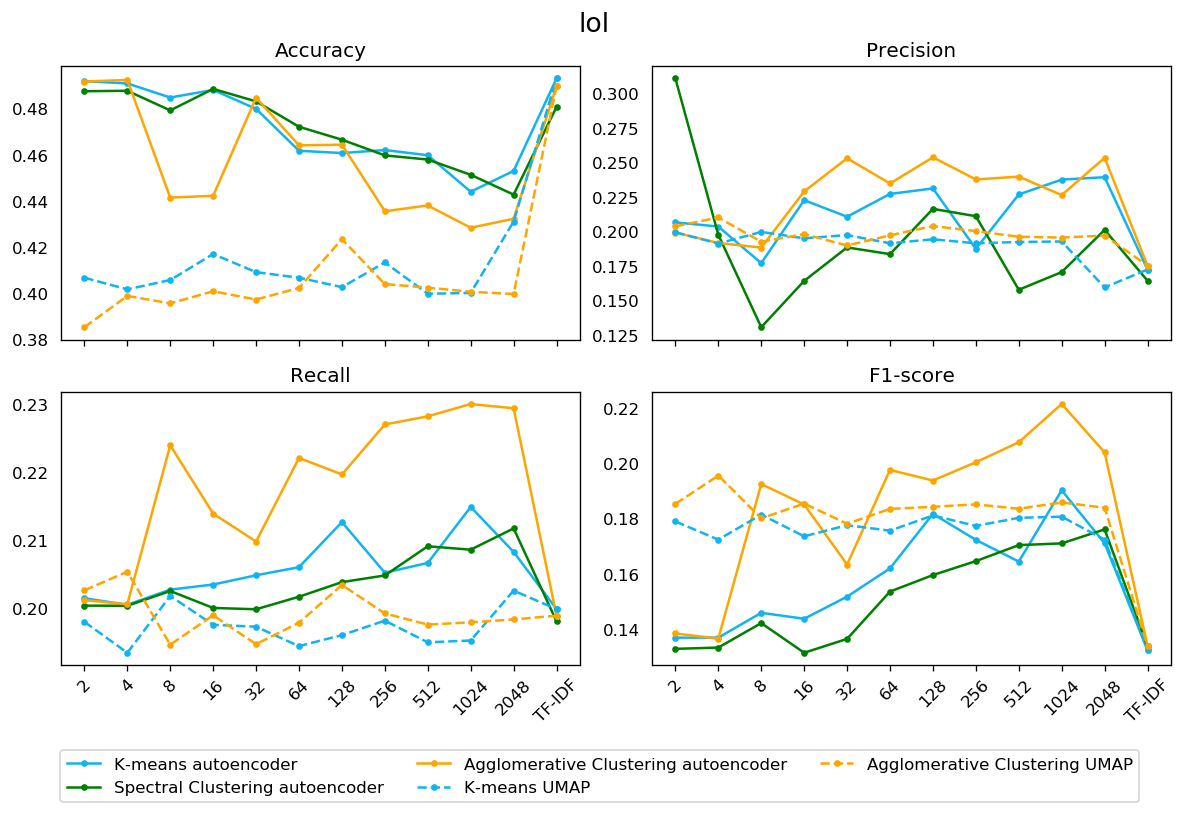

In [113]:
# Create Figure and Subplots
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=False, dpi=120)
emb_labels = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, "TF-IDF"]
#emb_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, "TFIDF"]
title = ["Accuracy", "Precision", "Recall", "F1-score", "Kappa"]
colors = [[0.065, 0.705, 0.941], "green", "orange", [0.065, 0.705, 0.941], "orange"]
linestyles = ['-', '-', '-', '--', '--']
markers = ['.', '.', '.', '.', '.']

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    y = []
    y_1 = []
    y_2 = []
    y_3 = []
    y_4 = []
    y_5 = []
    for j in range(len(k_means[0])):
        y_1.append(k_means[0][j][i])
        y_2.append(sc[0][j][i])
        y_3.append(ac[0][j][i])
        y_4.append(k_means[1][j][i])
        y_5.append(ac[1][j][i])
    y.append(y_1), y.append(y_2), y.append(y_3), y.append(y_4), y.append(y_5)
    for j, p in enumerate(y):
        ax.plot(emb_labels, y[j], color=colors[j], linestyle=linestyles[j], marker=markers[j])  
    ax.set_xticklabels(labels=emb_labels,rotation=45);
    ax.set_title(title[i])
    ax.yaxis.set_ticks_position('none')

plt.suptitle('lol', verticalalignment='bottom', fontsize=16)    
plt.tight_layout()
plt.legend(['K-means autoencoder', 'Spectral Clustering autoencoder', 'Agglomerative Clustering autoencoder', 'K-means UMAP', 'Agglomerative Clustering UMAP'], bbox_to_anchor=[-0.1, -0.5], loc="lower center", borderaxespad=0., ncol=3)
plt.show()